# Lab 07

## Introduction to Jupyter Notebooks

In this assignment, you’ll be introduced to simulation, inference, and prediction.

## Guidelines

- Follow good programming practices by using descriptive variable names, maintaining appropriate spacing for readability, and adding comments to clarify your code.

- Ensure written responses use correct spelling, complete sentences, and proper grammar.

**Name:**

**Section:**

**Date:**

Let's get started!

## The Bootstrap

Bootstrapping is one of the simplest, yet most powerful methods in all of statistics. It provides us an easy way to get a sense of what might happen if we could repeat an experiment several times. It turns estimates into distributions that can be used to calculate all kinds of stuff, including standard errors, confidence intervals and even $p-$values.

Below is a video that explains the main ideas behind this computational technique.

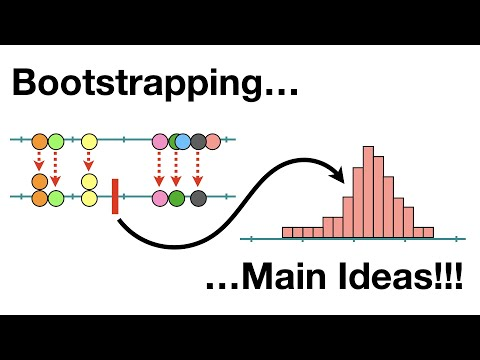

In [156]:
from IPython.display import YouTubeVideo

# YouTube video ID
video_id = 'Xz0x-8-cgaQ'

# Embed the YouTube video
YouTubeVideo(video_id, width=800, height=400)

Most of the time when you're conducting research, it's impractical to collect data from the entire population. This can be due to budget, time constraints, or other factors. Instead, a subset of the population is taken and insight is gathered from that subset to learn more about the population.

Suppose we had data that was the entire population - say all the salaries of the state employees of Minnesota. Before we load the data import the `datascience` package. 

In [157]:
...

Run the cell below to load the data.

In [158]:
mn = ...

## Minnesota State Employees

According to ZipRecruiter, the average government employee in Minnesota earns approximately \\$61,000 per year which translates to about \\$30 per hour.

Payscale reports that employees at the State of Minnesota (MN) receive an average base salary of around \\$80,000 per year, based on over 18 reported individuals, with the highest reported salary reaching \\$136,000.

For a broader perspective, OpenGovPay indicates that the average public sector employee salary in Minnesota is approximately \\$75,000 per year and the median is roughly \\$71,000.

**Note:** These figures are based on secondary sources and submissions from employees or job listings. They are meant for general comparison only and may differ from actual salaries. For the most accurate and up-to-date information, consult official state payroll data.

**Question 1.** Print the number of rows, number of columns, and all column labels from the `mn` table.

In [159]:
...

Ellipsis

**Question 2.** Give a breif description of each variable and its data type.

In [160]:
...

Ellipsis

_**TYPE YOUR ANSWER HERE REPLACING THIS TEXT**_ 

**Question 3.** Before we start our analysis and complete our assignment we need to load `matplotlib.pyplot` and `numpy`. 

In [161]:
...

Ellipsis

**Question 4.** Calculate each employee’s total_wages and add it as a new column to the table.

In [162]:
mn = ...

mn.show(3)

regular_wages,overtime_wages,other_wages,total_wages
389213,14004.3,216130,619348
389213,3886.35,222802,615902
405416,0,209176,614592


**Question 5.** Find the min, mean, median, and max salary for all Minnesota state employees rounded to the nearest dollar.

In [163]:
...

min 7
mean 74185
median 73597
max 619348


**Question 6.** Create a histogram to visualize the distribution of values in the `total_wages` column.

In [164]:
...

Ellipsis

# A Sample

A random sample is a subset of data or individuals taken from a larger population or dataset in such a way that each member of the population has an equal and independent chance of being included in the sample. The goal of taking a random sample is to ensure that the sample is representative of the entire population, allowing for valid statistical inferences and generalizations to be made about the population as a whole.

Sample one observation from the `mn` table.

**Note:** The `.sample()` method, by default, samples with replacement. This means that the same element can be chosen more than once in the random sample. If you want to sample without2 replacement (each element can only be chosen once), you need to explicitly set the `with_replacement` argument to `False`. 

In [165]:
...

regular_wages,overtime_wages,other_wages,total_wages
76096.2,146.84,95.88,76338.9


If we re-run the code cell above, we would most likely get a different value. Try it and see.

In [166]:
...

regular_wages,overtime_wages,other_wages,total_wages
113418,22440.6,0,135858


What we want to do is draw a large enough sample from a population in order to draw conclusions about a population without having to examine every single member of that population. In our activity we have the population, but for the sake of this activity let's pretend that we don't.

To ensure that your work is reproducible we will set a seed. What does it mean to set a seed?

In the context of the Python programming language, setting a seed refers to initializing the random number generator with a specific value. This is important when you want to ensure reproducibility in your code, especially when generating random numbers.

In Python, the random number generator is used in functions that involve randomness, such as sampling or generating random numbers from distributions. When you set a seed, you are essentially starting the random number generator at a specific point, and if you use the same seed again, you should get the same sequence of random numbers.

We can use the `np.random.seed()` function to set the random seed to a specific value, ensuring that results are reproducible each time the code is run.

In the cell below set the seed for this notebook using any 3 digit number.

In [167]:
seed = ...
np.random.seed(seed)

Sample 500 observations from the `mn` table.

In [168]:
s = ...
mn_sample = mn.sample(k=s)
mn_sample.num_rows

500

What are the mean and median salaries in our sample? Is it the same value as the median salary in the full datasaet?

In [169]:
print('The mean salary in our sample of', s, 'is', np.mean(mn_sample.column('total_wages')))
print('The mean salary in our population of', mn.num_rows, 'is', np.mean(mn.column('total_wages')))
print('The median salary in our sample of', s, 'is', np.median(mn_sample.column('total_wages')))
print('The median salary in our population of', mn.num_rows, 'is', np.median(mn.column('total_wages')))

The mean salary in our sample of 500 is 71917.69414
The mean salary in our population of 69137 is 74184.520662
The median salary in our sample of 500 is 71493.095
The median salary in our population of 69137 is 73596.56


**Question 7.** Could we make a statement about the population based off of our sample of 500 observations? Would this be a good idea? Explain.

_**TYPE YOUR ANSWER HERE REPLACING THIS TEXT**_ 

## A Bootstrap Sample Mean

Suppose we take a random sample from our sample (with replacement). Would that give us a better idea of the mean salary for a typical full-time City of Raleigh employee?

Let's try!

Collect one bootstrap sample from the `mn_sample` table. Calculate the mean of that sample.

In [170]:
one_bootstrap_sample = mn_sample.sample(k = s, with_replacement = True)

Calculate the mean of the bootstrap sample

In [171]:
# Calculate the median of one bootstrap sample
print('The mean salary in our bootstrap sample of', s, 'is', np.mean(one_bootstrap_sample.column('total_wages')))
print('The mean salary in our population of', mn.num_rows, 'is', np.mean(mn.column('total_wages')))

The mean salary in our bootstrap sample of 500 is 72607.56118
The mean salary in our population of 69137 is 74184.520662


If we did another bootstrap sample and calculated it's mean, do you think we would get the same value? Explain.

In [172]:
one_bootstrap_sample = mn_sample.sample(k = s, with_replacement = True)
print('The mean salary in our bootstrap sample of', s, 'is', np.mean(one_bootstrap_sample.column('total_wages')))
print('The mean salary in our population of', mn.num_rows, 'is', np.mean(mn.column('total_wages')))

The mean salary in our bootstrap sample of 500 is 70377.53966
The mean salary in our population of 69137 is 74184.520662


What if we did another 10000 bootstrap samples and calculated the mean each time, do you think we would ever the same mean? Explain.

## Lots of Bootstrap Sample Means

**Question 8.** Create a list with 10000 bootstrap sample means.

In [173]:
bootstrap_sample_means = []

...

Verify that there are 10000 sample means in the list.

In [174]:
len(bootstrap_sample_means)

10000

**Question 9.** To analyze the distribution (i.e.; frequency and pattern) of our bootstrap means visualize the `bootstrap_sample_means` data using a histogram.

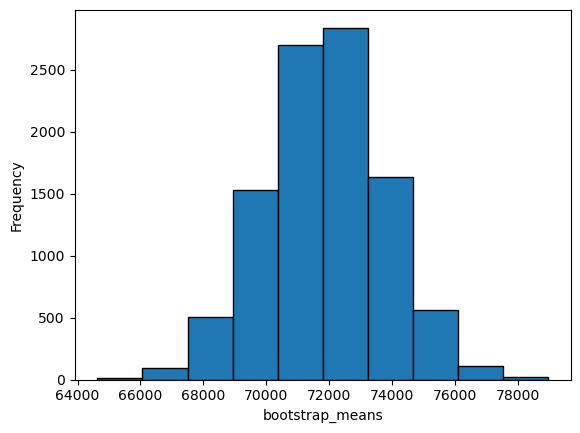

In [175]:
plt.hist(bootstrap_sample_means, edgecolor = 'black')
plt.xlabel('bootstrap_means')
plt.ylabel('Frequency');

Based on the histogram above, do you think the true mean salary (or at least a value that's really close to it) occurs more frequently that other values? Explain.

Show the location of the mean of all the bootstrap sample means and the true average salary.

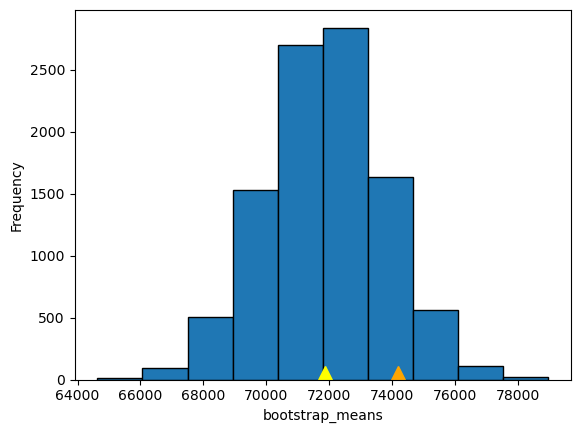

In [176]:
plt.hist(bootstrap_sample_means, edgecolor = 'black')

plt.plot(np.mean(mn.column('total_wages')), 0, marker = '^', color = 'orange', markersize = 20)
plt.plot(np.mean(bootstrap_sample_means), 0, marker = '^', color = 'yellow', markersize = 20)

plt.xlabel('bootstrap_means')
plt.ylabel('Frequency');

In [177]:
print('The mean salary in our list of bootstrap sample means of', len(bootstrap_sample_means), 'is', np.mean(bootstrap_sample_means))
print('The mean salary in our population of', mn.num_rows, 'is', np.mean(mn.column('total_wages')))

The mean salary in our list of bootstrap sample means of 10000 is 71863.0463442
The mean salary in our population of 69137 is 74184.520662


If we did this again do you think that the mean of the bootstrapped sample means would be closer to the true mean salary? Further away? Explain.

Show the location of the mean of all the bootstrap sample means, the population mean salary, and a 95% confidence interval.

The 95% confidence interval is ( 68170.58 , 75541.31 )
The mean salary in our list of bootstrap sample means of 10000 is 71863.0463442
The mean salary in our population of 69137 is 74184.520662


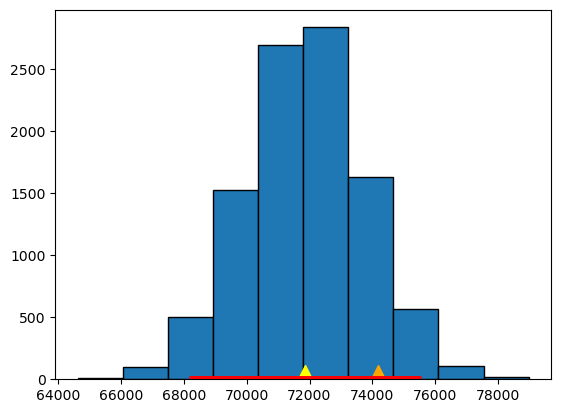

In [178]:
lower_bound = np.percentile(bootstrap_sample_means, 2.5)
upper_bound = np.percentile(bootstrap_sample_means, 97.5)

plt.hist(bootstrap_sample_means, edgecolor = 'black')

plt.plot(np.mean(mn.column('total_wages')), 0, marker = '^', color = 'orange', markersize = 20)
plt.plot(np.mean(bootstrap_sample_means), 0, marker = '^', color = 'yellow', markersize = 20)

plt.hlines(0, lower_bound, upper_bound, color = 'red', linewidth = 5)

print("The 95% confidence interval is (", round(lower_bound, 2), ",",round(upper_bound, 2), ")")
print('The mean salary in our list of bootstrap sample means of', len(bootstrap_sample_means), 'is', np.mean(bootstrap_sample_means))
print('The mean salary in our population of', mn.num_rows, 'is', np.mean(mn.column('total_wages')))

Show the location of the mean of all the bootstrap sample means, the population average salary, and a 90% confidence interval.

The 90% confidence interval is ( 68762.1 , 74976.96 )
The mean salary in our list of bootstrap sample means of 10000 is 71863.0463442
The mean salary in our population of 69137 is 74184.520662


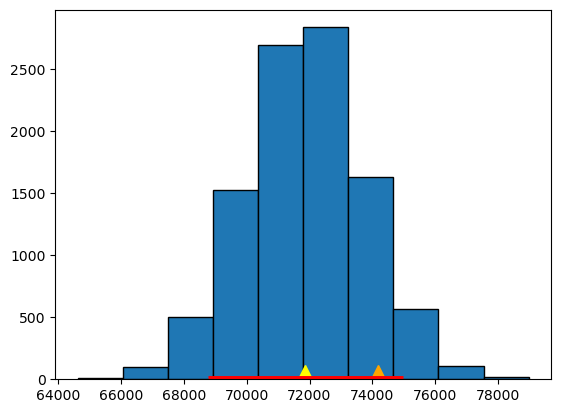

In [179]:
lower_bound = np.percentile(bootstrap_sample_means, 5)
upper_bound = np.percentile(bootstrap_sample_means, 95)

plt.hist(bootstrap_sample_means, edgecolor = 'black')

plt.plot(np.mean(mn.column('total_wages')), 0, marker = '^', color = 'orange', markersize = 20)
plt.plot(np.mean(bootstrap_sample_means), 0, marker = '^', color = 'yellow', markersize = 20)

plt.hlines(0, lower_bound, upper_bound, color = 'red', linewidth = 5)

print("The 90% confidence interval is (", round(lower_bound, 2), ",",round(upper_bound, 2), ")")
print('The mean salary in our list of bootstrap sample means of', len(bootstrap_sample_means), 'is', np.mean(bootstrap_sample_means))
print('The mean salary in our population of', mn.num_rows, 'is', np.mean(mn.column('total_wages')))

**Question 10.** Does the true mean appear within the conficence interval? If not, do you think we could perform a simulation where the true mean of the population falls inside of the confidence interval? If so, do you think we could perform a simulation where the true mean of the population falls outside of the confidence interval? Explain.

_**TYPE YOUR ANSWER HERE REPLACING THIS TEXT**_ 